In [31]:
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [17]:
from keras.utils import image_dataset_from_directory
train_data = image_dataset_from_directory(directory='train',
                                          label_mode='categorical',
                                          image_size=(224,224),
                                          shuffle=True
                                          )

Found 28710 files belonging to 7 classes.


In [18]:
test_data = image_dataset_from_directory(directory='test',
                                         label_mode='categorical',
                                         image_size=(224,224),
                                         shuffle=True)

Found 7178 files belonging to 7 classes.


In [20]:
test_data.class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [35]:
test_data.class_names

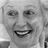

In [21]:
from PIL import Image
Image.open('train/happy/im5.png')

In [22]:
from keras.applications.mobilenet_v2 import MobileNetV2
pretrained_model = MobileNetV2(weights='imagenet',classes=7,include_top=False,input_shape=(224,224,3))

In [23]:
from keras import Sequential
mobile_model = Sequential()

In [24]:
for layer in pretrained_model.layers[:-1]:
    layer.trainable=False

In [25]:
pretrained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [26]:
from keras.layers import Flatten,Dense

In [27]:
mobile_model.add(pretrained_model)
mobile_model.add(Flatten())
mobile_model.add(Dense(7,activation='softmax'))

In [28]:
mobile_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_1 (Dense)             (None, 7)                 439047    
                                                                 
Total params: 2697031 (10.29 MB)
Trainable params: 439047 (1.67 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [29]:
mobile_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')

In [37]:
training_model = mobile_model.fit(train_data,validation_data=test_data,epochs=5)

Epoch 1/5
898/898 [==============================] - 393s 436ms/step - loss: 4.9863 - accuracy: 0.3273 - val_loss: 6.5345 - val_accuracy: 0.3760
Epoch 2/5
898/898 [==============================] - 376s 418ms/step - loss: 3.5363 - accuracy: 0.4602 - val_loss: 6.1136 - val_accuracy: 0.3093
Epoch 3/5
898/898 [==============================] - 377s 420ms/step - loss: 3.1694 - accuracy: 0.5225 - val_loss: 6.3369 - val_accuracy: 0.3688
Epoch 4/5
898/898 [==============================] - 379s 422ms/step - loss: 2.4312 - accuracy: 0.5841 - val_loss: 6.8202 - val_accuracy: 0.3426
Epoch 5/5
898/898 [==============================] - 369s 411ms/step - loss: 2.3611 - accuracy: 0.6152 - val_loss: 7.0334 - val_accuracy: 0.4011


In [42]:
import matplotlib.pyplot as plt

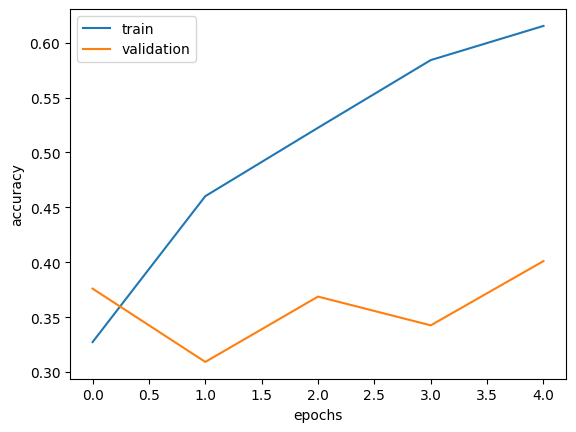

In [50]:
plt.plot(training_model.history['accuracy'])
plt.plot(training_model.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])